## **1st Attempt**
Objective is the run the code with all features as is. Due to limitations of Random Forest modeling only able to intake strictly categorical and numerical values, any colum with a combination of both has been factorized to have a numerical value for distinguishment. 

In [23]:
import pandas as pd

trans = pd.read_csv('Files_CSV/HI-Small_Trans.csv')

# Column Names Change
trans.rename(columns={'Account': 'Acc. Orig.', 'Account.1': 'Acc. End'}, inplace=True)

# Standardization

col_to_int = ['From Bank', 'To Bank', 'Is Laundering']
col_to_float = ['Amount Received', 'Amount Paid']
trans[col_to_int] = trans[col_to_int].astype(int)
trans[col_to_float] = trans[col_to_float].astype(float)
trans['Timestamp'] = pd.to_datetime(trans['Timestamp'])

# Category Mapping
codes, acc_mapping = pd.factorize(all_acc)
map_acc = dict(zip(acc_mapping, codes))
trans['Acc. Orig. (int)'] = trans['Acc. Orig.'].map(map_acc)
trans['Acc. End (int)'] = trans['Acc. End'].map(map_acc)

all_curr = pd.concat([trans['Receiving Currency'], trans['Payment Currency']]).unique()
codes, curr_mapping = pd.factorize(all_curr)
map_curr = dict(zip(curr_mapping, codes))
trans['Receiving Currency (int)'] = trans['Receiving Currency'].map(map_curr)
trans['Payment Currency (int)'] = trans['Payment Currency'].map(map_curr)

all_format = trans['Payment Format'].unique()
codes, format_mapping = pd.factorize(all_format)
map_format = dict(zip(format_mapping, codes))
trans['Payment Format (int)'] = trans['Payment Format'].map(map_format)

# Drop Columns
col_drop = ['Timestamp', 'Acc. Orig.', 'Acc. End', 'Receiving Currency', 'Payment Currency','Payment Format']
trans_drop_col = trans.drop(columns=col_drop, axis=1, inplace=True)

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Random Forest Model
X = trans.drop(['Is Laundering'], axis=1)
y = trans['Is Laundering']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=50, random_state=8, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1521902
           1       0.07      0.04      0.05      1602

    accuracy                           1.00   1523504
   macro avg       0.53      0.52      0.52   1523504
weighted avg       1.00      1.00      1.00   1523504

[[1521036     866]
 [   1541      61]]


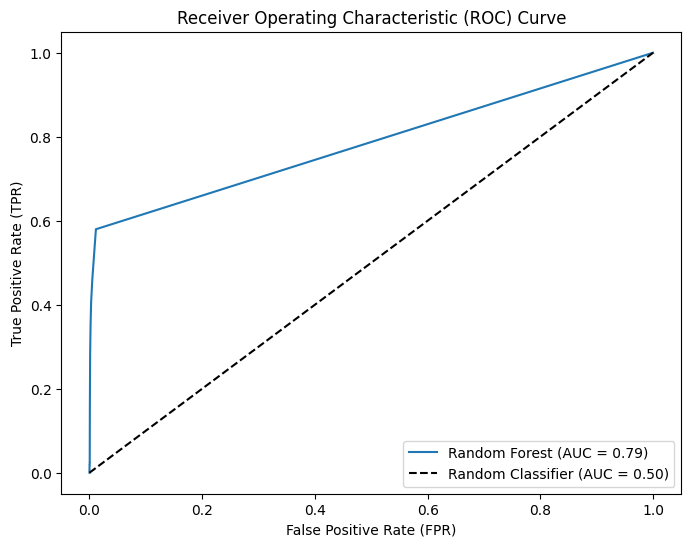

In [25]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.50)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()